In [114]:
import pandas as pd

In [115]:
Listings = pd.read_csv('D:/My RoadMap/Projects/Python/Airbnb Listings & Reviews/Listings.csv',encoding="ISO-8859-1",low_memory=False, parse_dates=['host_since'])


In [116]:
Listings.dtypes

listing_id                              int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                      object
host_total_listings_count             float64
host_has_profile_pic                   object
host_identity_verified                 object
neighbourhood                          object
district                               object
city                                   object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                              float64
amenities                         

In [117]:
Paris_Listings =(Listings[Listings['city']=='Paris']
                 [['host_since','neighbourhood','city','accommodates','price']])
Paris_Listings

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [118]:
Paris_Listings.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [119]:
Paris_Listings.drop_duplicates()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279706,2013-07-31,Batignolles-Monceau,Paris,2,135
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50


In [120]:
Paris_Listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [121]:
Paris_Listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [122]:
paris_listings_neighbourhood = (
        Paris_Listings
        .groupby('neighbourhood')      
        .agg({'price': 'mean'})          
        .sort_values('price', ascending=True)  
        .reset_index()
    )
paris_listings_neighbourhood.tail()

,neighbourhood,price
15,Luxembourg,155.638639
16,Palais-Bourbon,156.856578
17,Passy,161.144635
18,Louvre,175.379972
19,Elysee,210.536765


In [123]:
paris_listings_accomodations = (
    Paris_Listings
    .query('neighbourhood=="Elysee"')
    .groupby('accommodates')
    .agg({'price': 'mean','neighbourhood':'count'})
    .sort_values('price',ascending=True)
    .reset_index()
)
paris_listings_accomodations.head()

,accommodates,price,neighbourhood
0,0,0.000000,6
1,1,79.522222,90
2,3,152.828767,146
3,2,155.103352,716
4,4,212.096070,458


In [124]:
import datetime
Paris_Listings['host_year'] =Paris_Listings['host_since'].dt.year


In [125]:
paris_listings_over_time = (
    Paris_Listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        'price': 'mean','neighbourhood': 'count'}
    )
    .reset_index()
)

In [126]:
paris_listings_over_time

,host_since,price,neighbourhood
0,2008-12-31,77.750000,4
1,2009-12-31,159.641509,106
2,2010-12-31,125.031250,416
3,2011-12-31,124.828230,1339
4,2012-12-31,111.578615,4592
5,2013-12-31,107.096414,8142
6,2014-12-31,100.253800,10922
7,2015-12-31,103.646250,12147
8,2016-12-31,114.159847,8871
9,2017-12-31,108.658888,4585


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns 

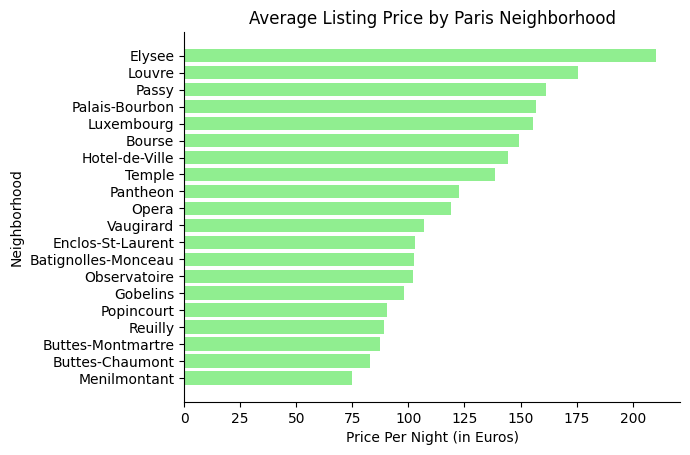

In [128]:
#(kind='barh', color='skyblue')

plt.barh(
    paris_listings_neighbourhood['neighbourhood'],
    paris_listings_neighbourhood['price'],
    color='LightGReen'
)
plt.xlabel('Price Per Night (in Euros)')
plt.ylabel('Neighborhood')
plt.title('Average Listing Price by Paris Neighborhood')
sns.despine()

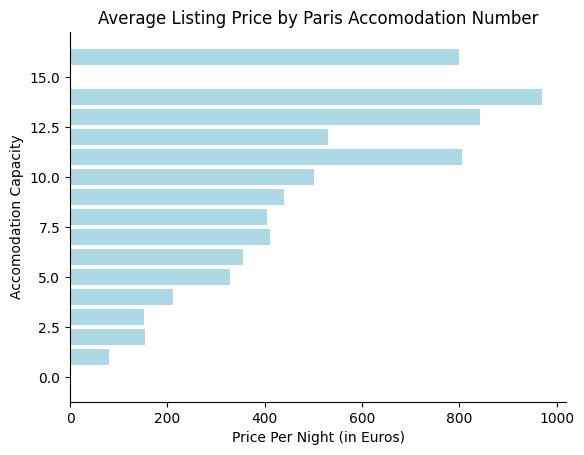

In [129]:
plt.barh(
    paris_listings_accomodations['accommodates'],
    paris_listings_accomodations['price'],
    color='Lightblue'
)
plt.xlabel('Price Per Night (in Euros)')
plt.ylabel('Accomodation Capacity')
plt.title('Average Listing Price by Paris Accomodation Number')
sns.despine()


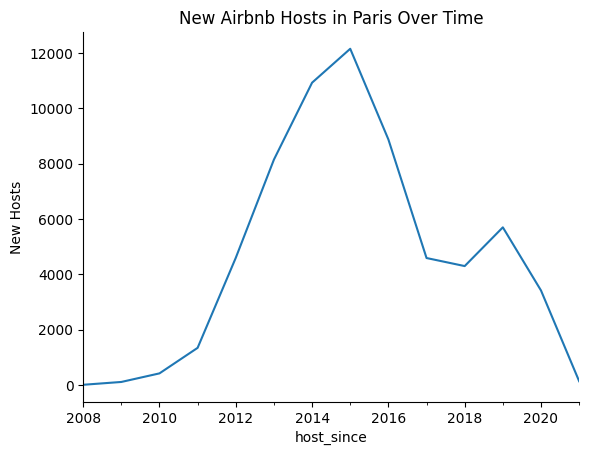

In [136]:
paris_listings_over_time.plot('host_since','neighbourhood')
plt.legend().remove()
plt.ylabel("New Hosts")
plt.title("New Airbnb Hosts in Paris Over Time")
sns.despine()

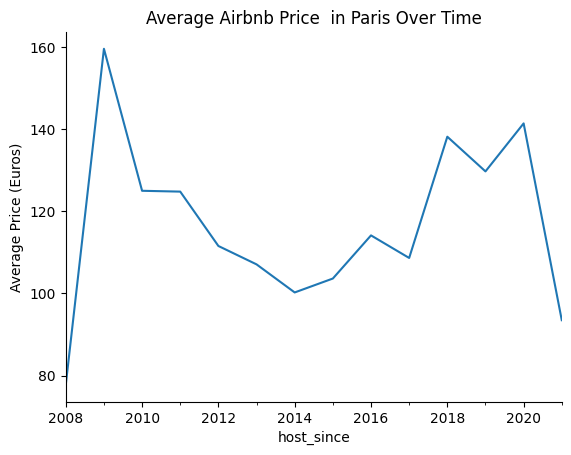

In [137]:
paris_listings_over_time.plot('host_since','price')
plt.legend().remove()
plt.ylabel("Average Price (Euros)")
plt.title("Average Airbnb Price  in Paris Over Time")
sns.despine()